In [1]:
import json
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from datetime import date
from datetime import datetime
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn import model_selection, naive_bayes, svm
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df1 = pd.read_csv('fake reviews dataset.csv')

In [3]:
df1

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [4]:
df1['label'].unique()

array(['CG', 'OR'], dtype=object)

In [5]:
# df1.to_csv('twepy.csv')

In [6]:
df1.shape

(40432, 4)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [8]:
#missing data
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
category,0,0.0
rating,0,0.0
label,0,0.0
text_,0,0.0


In [9]:
df1.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
df1.corr()

,rating
rating,1.0


In [11]:
df1['label'].unique()

array(['CG', 'OR'], dtype=object)

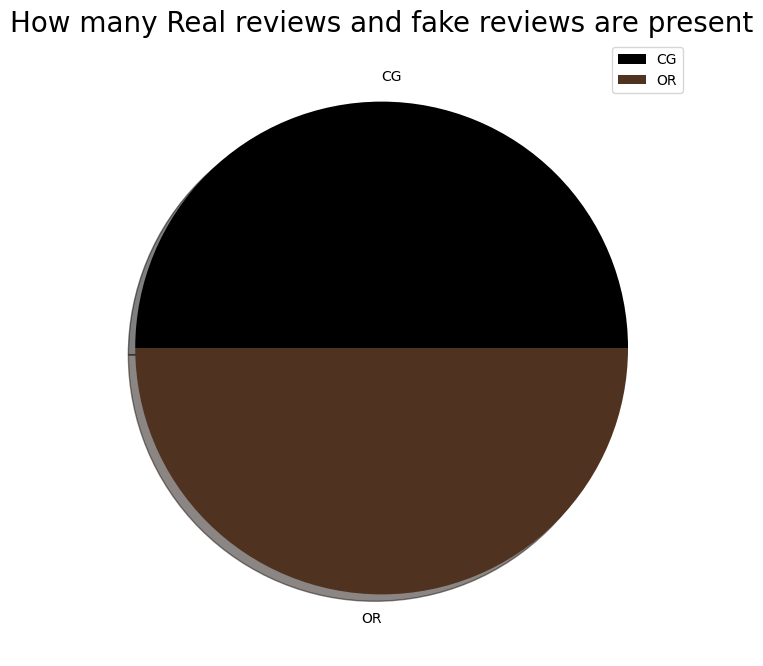

In [12]:
# plotting a pie chart to represent share of international repuatation

labels = ['CG', 'OR']
sizes = df1['label'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('How many Real reviews and fake reviews are present', fontsize = 20)
plt.legend()
plt.show()

In [13]:
for column_name in df1:
    num_nan_a = df1.loc[ (pd.isna(df1[column_name])) , column_name ].shape[0]

    print(f"There are {num_nan_a} NaNs in column "+column_name)

There are 0 NaNs in column category
There are 0 NaNs in column rating
There are 0 NaNs in column label
There are 0 NaNs in column text_


In [14]:
df1['text_']

0        Love this!  Well made, sturdy, and very comfor...
1        love it, a great upgrade from the original.  I...
2        This pillow saved my back. I love the look and...
3        Missing information on how to use it, but it i...
4        Very nice set. Good quality. We have had the s...
                               ...                        
40427    I had read some reviews saying that this bra r...
40428    I wasn't sure exactly what it would be. It is ...
40429    You can wear the hood by itself, wear it with ...
40430    I liked nothing about this dress. The only rea...
40431    I work in the wedding industry and have to wor...
Name: text_, Length: 40432, dtype: object

In [15]:
# import nltk
# nltk.download('all')
# Step - a : Remove blank rows if any.
df1['text_'].dropna()
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df1['text_'] = [str(entry).lower() for entry in df1['text_']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df1['text_']= [word_tokenize(entry) for entry in df1['text_']]

In [16]:
import nltk
# nltk.download('all')
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [17]:
for index,entry in enumerate(df1['text_']):
    # Declaring Empty List to store the words that follow the rules for this step
    Tweet_text = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Tweet_text.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df1.loc[index,'final_Reviews'] = str(Tweet_text)

In [27]:
df1

,category,rating,label,text_,final_Reviews
0,Home_and_Kitchen_5,5.0,CG,"[love, this, !, well, made, ,, sturdy, ,, and,...","['love', 'well', 'make', 'sturdy', 'comfortabl..."
1,Home_and_Kitchen_5,5.0,CG,"[love, it, ,, a, great, upgrade, from, the, or...","['love', 'great', 'upgrade', 'original', 'mine..."
2,Home_and_Kitchen_5,5.0,CG,"[this, pillow, saved, my, back, ., i, love, th...","['pillow', 'save', 'back', 'love', 'look', 'fe..."
3,Home_and_Kitchen_5,1.0,CG,"[missing, information, on, how, to, use, it, ,...","['miss', 'information', 'use', 'great', 'produ..."
4,Home_and_Kitchen_5,5.0,CG,"[very, nice, set, ., good, quality, ., we, hav...","['nice', 'set', 'good', 'quality', 'set', 'two..."
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,"[i, had, read, some, reviews, saying, that, th...","['read', 'review', 'say', 'bra', 'run', 'small..."
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,"[i, was, n't, sure, exactly, what, it, would, ...","['sure', 'exactly', 'would', 'little', 'large'..."
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"[you, can, wear, the, hood, by, itself, ,, wea...","['wear', 'hood', 'wear', 'hood', 'wear', 'jack..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,"[i, liked, nothing, about, this, dress, ., the...","['like', 'nothing', 'dress', 'reason', 'give',..."


In [28]:
df1['text_'].replace('[[,',' ',inplace=True)

In [29]:
dff1 = df1.replace(r'^\s*$@ð#<>?!%^&*', np.nan, regex=True)

In [30]:
dff1['label'] = dff1.label.map({'CG': 0, 'OR': 1})

In [31]:
dff1

,category,rating,label,text_,final_Reviews
0,Home_and_Kitchen_5,5.0,0,"[love, this, !, well, made, ,, sturdy, ,, and,...","['love', 'well', 'make', 'sturdy', 'comfortabl..."
1,Home_and_Kitchen_5,5.0,0,"[love, it, ,, a, great, upgrade, from, the, or...","['love', 'great', 'upgrade', 'original', 'mine..."
2,Home_and_Kitchen_5,5.0,0,"[this, pillow, saved, my, back, ., i, love, th...","['pillow', 'save', 'back', 'love', 'look', 'fe..."
3,Home_and_Kitchen_5,1.0,0,"[missing, information, on, how, to, use, it, ,...","['miss', 'information', 'use', 'great', 'produ..."
4,Home_and_Kitchen_5,5.0,0,"[very, nice, set, ., good, quality, ., we, hav...","['nice', 'set', 'good', 'quality', 'set', 'two..."
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,"[i, had, read, some, reviews, saying, that, th...","['read', 'review', 'say', 'bra', 'run', 'small..."
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,"[i, was, n't, sure, exactly, what, it, would, ...","['sure', 'exactly', 'would', 'little', 'large'..."
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"[you, can, wear, the, hood, by, itself, ,, wea...","['wear', 'hood', 'wear', 'hood', 'wear', 'jack..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,"[i, liked, nothing, about, this, dress, ., the...","['like', 'nothing', 'dress', 'reason', 'give',..."


In [32]:
from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('https')  # remove htps to the world Cloud

def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

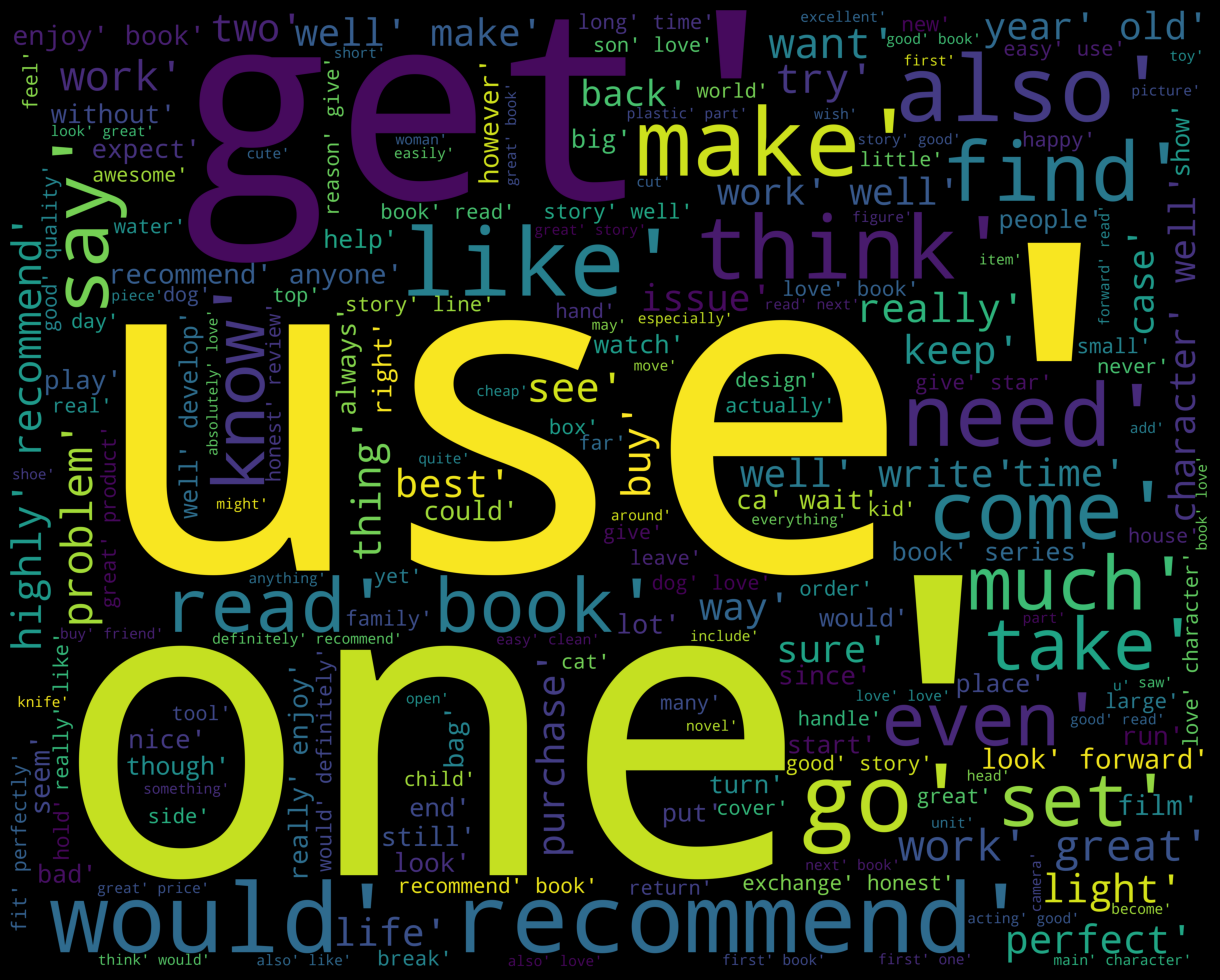

In [33]:
text = dff1.final_Reviews.values

Plot_world(text)

In [34]:
dff1.dropna(inplace=True)

In [36]:
# text = dff1.Location.values

# Plot_world(text)

In [37]:
dff1.to_csv('processed_reviews.csv')

In [38]:
Corpus= pd.read_csv('processed_reviews.csv')
Corpus

,Unnamed: 0,category,rating,label,text_,final_Reviews
0,0,Home_and_Kitchen_5,5.0,0,"['love', 'this', '!', 'well', 'made', ',', 'st...","['love', 'well', 'make', 'sturdy', 'comfortabl..."
1,1,Home_and_Kitchen_5,5.0,0,"['love', 'it', ',', 'a', 'great', 'upgrade', '...","['love', 'great', 'upgrade', 'original', 'mine..."
2,2,Home_and_Kitchen_5,5.0,0,"['this', 'pillow', 'saved', 'my', 'back', '.',...","['pillow', 'save', 'back', 'love', 'look', 'fe..."
3,3,Home_and_Kitchen_5,1.0,0,"['missing', 'information', 'on', 'how', 'to', ...","['miss', 'information', 'use', 'great', 'produ..."
4,4,Home_and_Kitchen_5,5.0,0,"['very', 'nice', 'set', '.', 'good', 'quality'...","['nice', 'set', 'good', 'quality', 'set', 'two..."
...,...,...,...,...,...,...
40427,40427,Clothing_Shoes_and_Jewelry_5,4.0,1,"['i', 'had', 'read', 'some', 'reviews', 'sayin...","['read', 'review', 'say', 'bra', 'run', 'small..."
40428,40428,Clothing_Shoes_and_Jewelry_5,5.0,0,"['i', 'was', ""n't"", 'sure', 'exactly', 'what',...","['sure', 'exactly', 'would', 'little', 'large'..."
40429,40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"['you', 'can', 'wear', 'the', 'hood', 'by', 'i...","['wear', 'hood', 'wear', 'hood', 'wear', 'jack..."
40430,40430,Clothing_Shoes_and_Jewelry_5,1.0,0,"['i', 'liked', 'nothing', 'about', 'this', 'dr...","['like', 'nothing', 'dress', 'reason', 'give',..."


In [40]:
Corpus.drop(['Unnamed: 0', 'category','rating','text_'], axis=1)

,label,final_Reviews
0,0,"['love', 'well', 'make', 'sturdy', 'comfortabl..."
1,0,"['love', 'great', 'upgrade', 'original', 'mine..."
2,0,"['pillow', 'save', 'back', 'love', 'look', 'fe..."
3,0,"['miss', 'information', 'use', 'great', 'produ..."
4,0,"['nice', 'set', 'good', 'quality', 'set', 'two..."
...,...,...
40427,1,"['read', 'review', 'say', 'bra', 'run', 'small..."
40428,0,"['sure', 'exactly', 'would', 'little', 'large'..."
40429,1,"['wear', 'hood', 'wear', 'hood', 'wear', 'jack..."
40430,0,"['like', 'nothing', 'dress', 'reason', 'give',..."


In [41]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['final_Reviews'],Corpus['label'],test_size=0.3)

In [42]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [43]:
listofclasses=list(Encoder.classes_)
listofclasses
algorithmname=[]
algoaccuracy=[]

In [44]:
Tfidf_vect = TfidfVectorizer(max_features=7, sublinear_tf=True, encoding='utf-8', decode_error='ignore')
Tfidf_vect.fit(Corpus['final_Reviews'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [45]:
# fit the training dataset on the NB classifier
import string as str
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
nb_accuracy = round(accuracy_score(predictions_NB, Test_Y)*100,2)
print("Naive Bayes Accuracy Score -> ", nb_accuracy," %")

Naive Bayes Accuracy Score ->  54.46  %


In [46]:
y_pred_test=Naive.predict(Test_X_Tfidf)

In [47]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
score_rt=round(metrics.accuracy_score(Test_Y, y_pred_test)*100,2)

In [48]:
score_rt_precision= round(metrics.precision_score(y_pred_test,Test_Y, average='weighted')*100,2)

In [49]:
score_rt_recall= round(metrics.recall_score(Test_Y, y_pred_test, average='weighted')*100,2)

In [50]:
score_rt_f1_score= round(metrics.f1_score(Test_Y, y_pred_test, average='weighted')*100,2)

In [51]:
print("Accuracy:",score_rt)
print("Precision:",score_rt_precision)
print("Recall:",score_rt_recall)
print("F1_Score:",score_rt_recall)

Accuracy: 54.46
Precision: 55.67
Recall: 54.46
F1_Score: 54.46


In [52]:
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(predictions_NB.tolist()) 

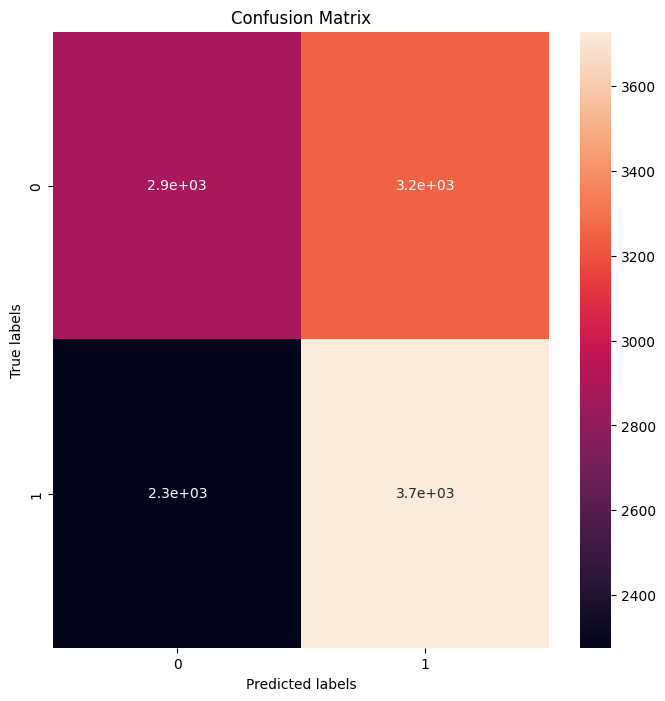

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
labels =listofclasses
ax= plt.subplot()
cm = confusion_matrix(expected, predicted)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# SVM

In [59]:
Tfidf_vect = TfidfVectorizer(max_features=7, sublinear_tf=True, encoding='utf-8', decode_error='ignore')
Tfidf_vect.fit(Corpus['final_Reviews'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [60]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(Train_X_Tfidf, Train_Y)

#Predict the response for test dataset
y_pred = clf.predict(Test_X_Tfidf)

In [61]:
svm_accuracy = round(accuracy_score(y_pred, Test_Y)*100,2)
print("SVM Accuracy Score ->", svm_accuracy," %")

SVM Accuracy Score -> 56.58  %


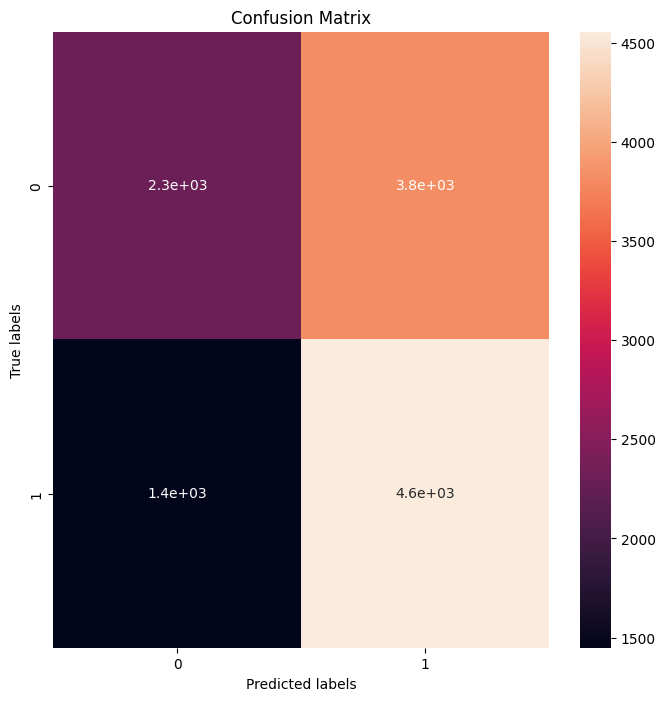

In [62]:
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(y_pred.tolist()) 

import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
labels =listofclasses
ax= plt.subplot()
cm = confusion_matrix(expected, predicted)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# logistic regression

In [63]:
Tfidf_vect = TfidfVectorizer(max_features=7, sublinear_tf=True, encoding='utf-8', decode_error='ignore')
Tfidf_vect.fit(Corpus['final_Reviews'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [64]:
# for c in [0.005,0.01, 0.05,0.3, 0.25, 0.75, 0.5, 0.8, 1]:
lr = LogisticRegression(C=0.01, max_iter=50000 )
lr.fit(Train_X_Tfidf,Train_Y)
lr_pred = lr.predict(Test_X_Tfidf)
lr_accuracy = round(accuracy_score(lr_pred, Test_Y)*100,2)
print("Training Accuracy: ", lr_accuracy)

Training Accuracy:  55.34


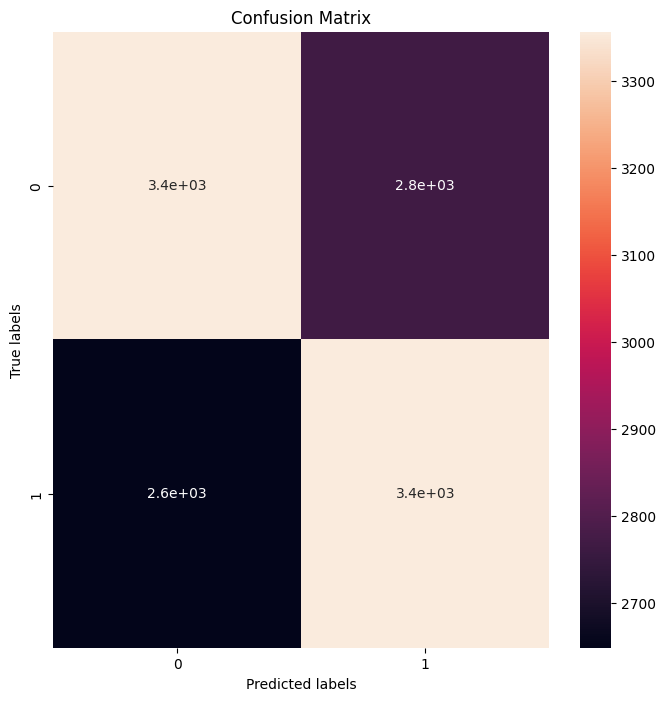

In [65]:
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(lr_pred.tolist()) 

import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
labels =listofclasses
ax= plt.subplot()
cm = confusion_matrix(expected, predicted)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Random Forest

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=7, sublinear_tf=True, encoding='utf-8', decode_error='ignore')
Tfidf_vect.fit(Corpus['final_Reviews'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(Train_X_Tfidf)
X_test = sc.transform(Test_X_Tfidf)

In [68]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(X_train, Train_Y)
y_predrf = regressor.predict(X_test)

In [69]:
rf_accuracy = round(accuracy_score(y_predrf, Test_Y)*100,2)
print("Random forest Accuracy Score ->", rf_accuracy," %")

Random forest Accuracy Score -> 56.46  %


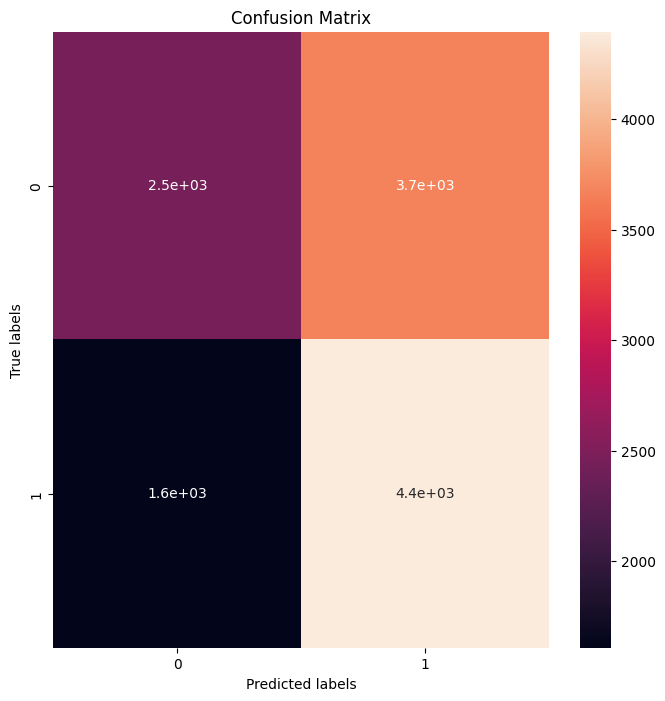

In [70]:
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(y_predrf.tolist()) 

import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
labels =listofclasses
ax= plt.subplot()
cm = confusion_matrix(expected, predicted)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

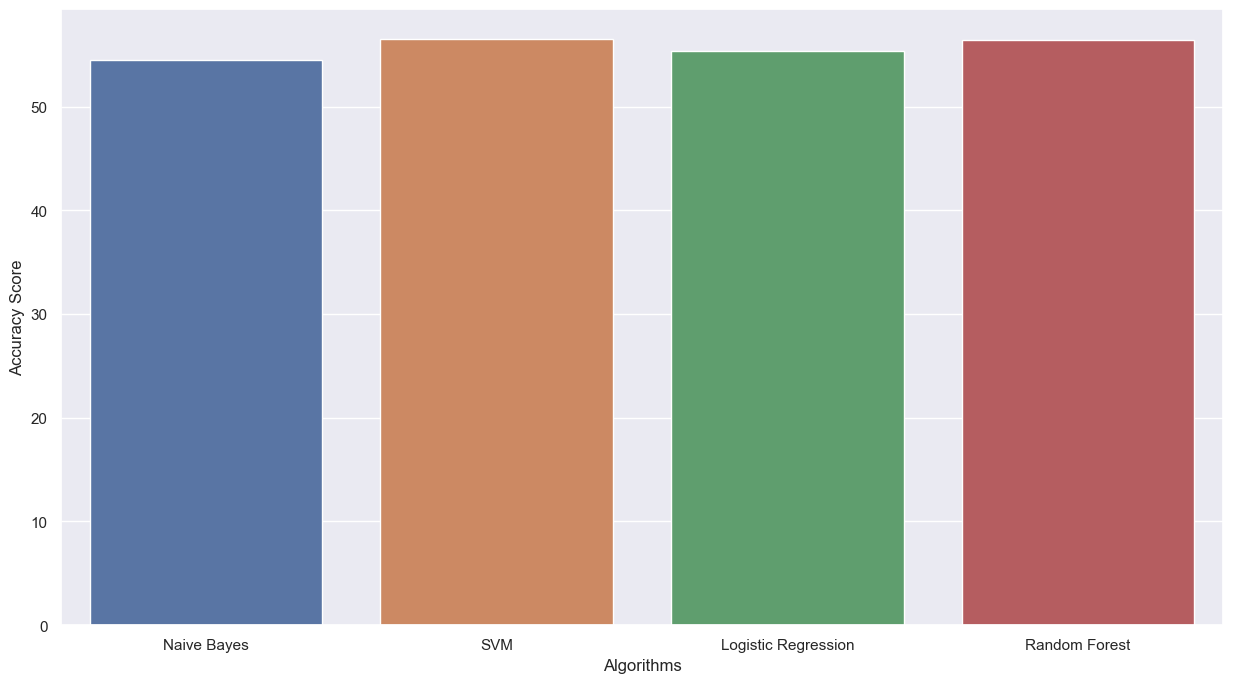

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

scores = [nb_accuracy, svm_accuracy, lr_accuracy, rf_accuracy]
algorithms = ["Naive Bayes", "SVM", "Logistic Regression", "Random Forest"]

sns.set(rc={'figure.figsize':(15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(x=algorithms, y=scores)
plt.show()


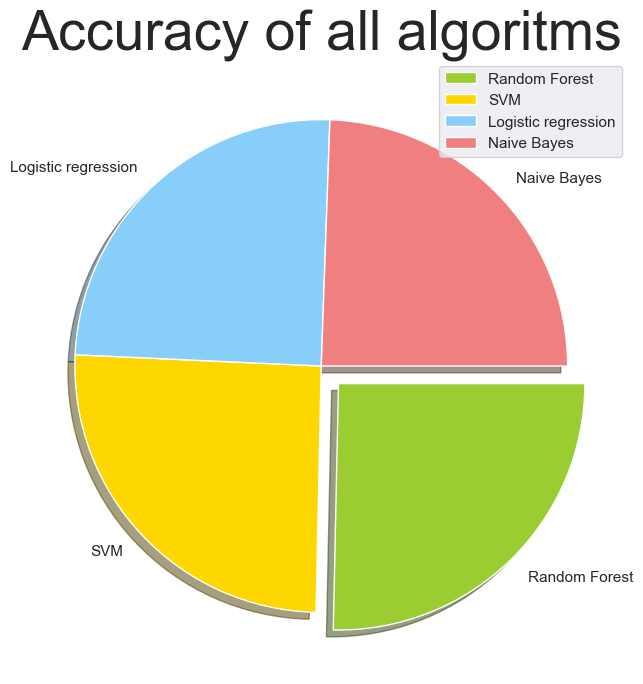

In [73]:
# plotting a pie chart to represent share of international repuatation

values = [rf_accuracy,svm_accuracy,lr_accuracy,nb_accuracy]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
labels = ['Random Forest', 'SVM', 'Logistic regression', 'Naive Bayes']
explode = [0.1, 0, 0, 0]

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(values, colors=colors, labels=labels, explode=explode, counterclock=False, shadow=True)
plt.title('Accuracy of all algoritms', fontsize = 40)
plt.legend()
plt.show()

In [74]:
print(X_train)

  (2, 1)	2.7499736703283095
  (2, 0)	1.9569633304256233
  (3, 3)	3.6483179372795225
  (4, 2)	3.187262301541193
  (5, 1)	3.365898466701569
  (6, 5)	0.8098783276058289
  (6, 4)	1.1549853310239715
  (6, 3)	0.9160114017310609
  (6, 1)	1.3115032097868127
  (6, 0)	2.605562576928986
  (8, 6)	2.568837327222707
  (8, 4)	2.011159614186122
  (11, 6)	1.7864176252015103
  (11, 4)	1.733526284262188
  (11, 3)	1.109219107255119
  (11, 2)	1.7853649291543157
  (12, 5)	2.2355790327228915
  (12, 0)	2.5762841429770744
  (13, 5)	1.5516993652147466
  (13, 0)	3.027652496792063
  (14, 6)	3.3871527025224384
  (15, 6)	1.9057917723811797
  (15, 5)	2.1956388384374903
  (15, 3)	1.1833406805625017
  (15, 2)	0.9075848560009072
  :	:
  (28285, 0)	3.056099684575941
  (28286, 6)	1.9222475006089177
  (28286, 2)	2.6242821191172543
  (28287, 6)	1.6029079067088958
  (28287, 3)	2.8532008308426087
  (28287, 2)	1.2924539430660784
  (28289, 6)	1.9644054408549372
  (28289, 5)	1.8259088145287532
  (28289, 3)	1.2197349705091622
  

In [75]:
print(Train_Y)

[0 1 0 ... 1 0 0]


# Naive bayes pickle

In [77]:
import pickle
with open('models/nb_pickle', 'wb') as f:
    pickle.dump(Naive,f)
    
if __name__=='__main__':
    with open('models/nb_pickle', 'rb') as f:
        Naive_users = pickle.load(f)
        
#nb = Naive_users.predict(Train_X_Tfidf)
#print(nb)

# SVM pickle

In [78]:
import pickle

with open('models/svm_pickle', 'wb') as f:
    pickle.dump(clf,f)
    
if __name__=='__main__':
    with open('models/svm_pickle', 'rb') as f:
        clf_users = pickle.load(f)
        
sv = clf_users.predict(Train_X_Tfidf)

# Linear regression pickel

In [79]:
import pickle

with open('models/dtc_pickle', 'wb') as f:
    pickle.dump(lr,f)
    
if __name__=='__main__':
    with open('models/dtc_pickle', 'rb') as f:
        dect_users = pickle.load(f)
        
lr = dect_users.predict(Train_X_Tfidf)

# Random Forest Classifier pickel

In [80]:
import pickle

with open('models/rfc_pickle', 'wb') as f:
    pickle.dump(regressor,f)
    
if __name__=='__main__':
    with open('models/rfc_pickle', 'rb') as f:
        regressor_users = pickle.load(f)
        
ranfc = regressor_users.predict(Train_X_Tfidf)

# Testing

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=7, sublinear_tf=True, encoding='utf-8', decode_error='ignore')
Tfidf_vect.fit(Corpus['final_Reviews'])
#Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

input_text="RT @Rajasthan_PYC: Happy birthday modiji #Modi #ModiFoolDay"

tf2=Tfidf_vect.transform([input_text])

#print(tf)

KeyError: 'final_tweet'

In [ ]:
#naive bayes
with open(r'model/nb_pickle','rb') as f:
    mp=pickle.load(f)
    red=mp.predict(tf2)
if red ==0:
    print("Ngative detected by Naive Bayes")
elif red==1:
    print("Neutral detected by Naive Bayes")
elif red==2:
    print("Positive detected by Naive Bayes")
else:
    print("Somthing went wrong detected by Naive Bayes")
    
#SVM    
with open(r'model/svm_pickle','rb') as f:
    mp=pickle.load(f)
    red=mp.predict(tf2)
if red==0:
    print("Negative detected by SVM")
elif red==1:
    print("Nutral detected by SVM")
elif red==2:
    print("Positive detected by SVM")
else:
    print("Somthing went wrong detected by SVM")
#random forest
with open(r'model/rfc_pickle','rb') as f:
    mp=pickle.load(f)
    red=mp.predict(tf2)
if red==0:
    print("Negative detected by random forest")
elif red==1:
    print("Neutral detected by random forest")
elif red==2:
    print("Positive detected by random forest")
else:
    print("Somthing went wrong detected by random forest")
#decision tree
with open(r'model/dtc_pickle','rb') as f:
    mp=pickle.load(f)
    red=mp.predict(tf2)
if red==0:
    print("Negative detected by decision tree")
elif red==1:
    print("Neutral detected by decision tree")
elif red==2:
    print("Positive detected by decision tree")
else:
    print("Somthing went wrong detected by decision tree")
red

In [ ]:
# import tweepy
# import tweepy as tw
# import pandas as pd

# # following the above mentioned procedure. 
# consumer_key = 'sguSeyqEiKu3mn9P41PGZUNgW'
# consumer_secret = '4vMkPpBFFZw09UFfbCntWSa6vxKH2vULg6X6OcLXDIsGfjcouf'
# access_key = '891879838830735361-Rndbz60ZTd70FZomkQBpqmwZZnmr09i'
# access_secret = "9vZrdo41hj0wKLroT5x5tukrVgQq3Z2Cfagsu9tMBCYPS"
  

# def get_tweets(query,dt,ut):       
#         # Authorization to consumer key and consumer secret 
#     auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
#         # Access to user's access key and access secret 
#     auth.set_access_token(access_key, access_secret) 
  
#         # Calling api 
#     api = tweepy.API(auth) 

#     tweets = []
#     count = 1

#     for tweet in tw.Cursor(api.search, q=query, lang='en', count=450, since=dt, until=ut).items(200):
#         # print(count)
#         count += 1

#         try: 
#             data = [tweet.created_at, tweet.id, tweet.user.location, tweet.text, tweet.user._json['screen_name'], tweet.user._json['name'], tweet.user._json['created_at'], tweet.entities['urls'],tweet.favorite_count, tweet.retweet_count]
#             # data = tuple(data)
#             tweets.append(data)
#         except tw.TweepError as e:
#             # print(e.reason) 
#             continue

#         except StopIteration:
#             break
#     return tweets

In [ ]:
b=input()
c=input("start")
d=input("end")

a=get_tweets(b,c,d)
df = pd.DataFrame(a, columns = ['created_at','tweet_id','Location', 'tweet_text', 'screen_name', 'name', 'account_creation_date', 'urls','Likes','Retweet'])

In [ ]:
df.head()

In [ ]:
a = ["abc","cde","def","hijk"]
b = [1,2,3,4]
c = [1,2,3,4]
d = [1,2,3,4]

df = pd.DataFrame([a,b,c,d], columns = ['a','b','c','d'])
df